## 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(-3, 3, size=100) # -3 到 3之间随机取值 
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

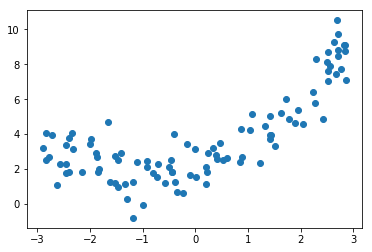

In [2]:
plt.scatter(x, y)
plt.show()

## 使用线性回归

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.score(X, y)

0.5457768082175471

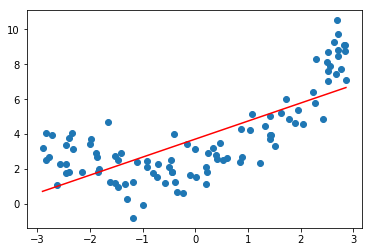

In [4]:
y_predict = lin_reg.predict(X)
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

---
使用均方误差衡量准确率(使用r^2，其实也可以)

In [5]:
from sklearn.metrics import mean_squared_error

y_predict = lin_reg.predict(X)
mean_squared_error(y, y_predict)

2.877666675014905

## 使用多项式回归
> **使用pipeline 封装多项式回归**

> **不同的degree观察效果,过拟合虽然减小了误差，但是并不能很好的反映趋势**

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures# 导入类，使用方法与之前归一化相同

def PolynomialRegression(my_degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=my_degree)),
        ('std_scaler', StandardScaler()),
        ('lin_reg', LinearRegression())
        ])

In [7]:
poly2_reg = PolynomialRegression(my_degree=2)
poly2_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [8]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y, y2_predict)

0.9910744418334072

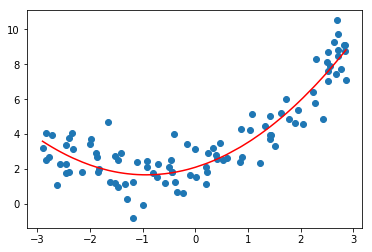

In [9]:
plt.scatter(x, y)
plt.plot(np.sort(x), y2_predict[np.argsort(x)], color='r')
plt.show()

---
令degree =10,100

In [10]:
poly10_reg = PolynomialRegression(my_degree=10)
poly10_reg.fit(X, y)
y10_predict = poly10_reg.predict(X)
mean_squared_error(y, y10_predict)

0.8563632165885173

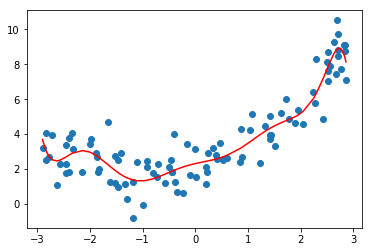

In [11]:
plt.scatter(x, y)
plt.plot(np.sort(x), y10_predict[np.argsort(x)], color='r')
plt.show()

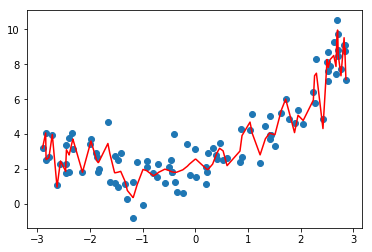

In [12]:
poly100_reg = PolynomialRegression(my_degree=100)
poly100_reg.fit(X, y)
y100_predict = poly100_reg.predict(X)
mean_squared_error(y, y100_predict)
plt.scatter(x, y)
plt.plot(np.sort(x), y100_predict[np.argsort(x)], color='r')
plt.show()